### Sentiment Analysis

**◆ Uses of Sentiment Analysis**

- It is necessary to analyze the emotions and sentiments contained in the text using machines without bias.
- Spam or malicious messages can be extracted and removed.
- A chatbot can analyze the emotional level of a message sent by a human and create a human-like response corresponding to it.

**◆ Sentiment analysis approach**

The following two methods are used

(1) using human-written rule-based algorithms; It is based on a dictionary (lexicon) containing pairs of specific words and sentiment scores, and the VADER algorithm ( Scikit Learn ) has exist

(2) using machine learning models where computers learn directly from data; Create rules by training a machine learning model using a set of sentences or documents with

#### 1. English Emotional Glossary

1. AFINN: assigns a score between -5 and 5 (positive/ negative)
2. Bing : positive / negative of words in binary format classification
3. NRC: 10 types emotion Use a glossary of terms
    {fear, anger, anticipation, trust, surprise, positive, negative, sadness, disgust, joy}
    http://jonathansoma.com/lede/algorithms-2017/classes/more-text-analysis/nrc-emotional-lexicon/
4. VADER : Score calculation for ( negative+neutral+positive =1)
    ( https://towardsdatascience.com/religion-on-twitter-5f7b84062304 )
    The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive).
   
    **▪ Typical threshold values:**
   
    - positive sentiment: compound score >= 0.05
   
    - neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
   
    - negative sentiment: compound score <= -0.05
   
5. SentiWordNet : SentiWordNet assigns to each synset of WordNet three sentiment scores: positivity, negativity, objectivity. https://github.com/aesuli/SentiWordNet

6. TextBlob : It provides common NLP tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more. ( https://textblob.readthedocs.io/en/dev/ )

    Negative : polatiry [-1 to 1]
   
    Subjectivity : subjectivity [objective:0 ~subjective:1]
   
7. SentimentR

#### 2. Emotional terms in Korean dictionary

For Korean, a free downloadable glossary is available. Incomplete. the Korean-ko-NRC-Emotion-Intensity-Lexicon-v1.txt file from google Applying the English sentiment analysis method using a translator is one method.

**1. IMDB movie review download and sentiment analysis (Using the glossary)**

In [1]:
import pandas as pd
import nltk
from afinn import afinn
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/junghunlee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
review = pd.read_csv('../../Data/IMDBDataset.csv')
review.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**2. AFINN Lexicon**

Calculate sentiment score using AFINN glossary(AFINN: consists of -5 to 5 points for each word)

In [3]:
afinn_ = afinn.Afinn()
pos_review = review['review'][1] # Print only one positive sentence
neg_review = review['review'][3] # print only one negative sentence
print(afinn_.score(pos_review))
print(afinn_.score(neg_review))

13.0
-8.0


In [4]:
afn = afinn.Afinn(emoticons = True)

In [5]:
# Parse only the first n sentences
n = 100
index = []
for row in review['review'][0:n] :
    index.append(row)
print(len(index), 'Predicted Sentiment Polarity : ', afn.score(row))

100 Predicted Sentiment Polarity :  41.0


**3. NRC Vocabulary**

Sentiment classification using NRC terminology (NRC: classifying each word into 10 sentiments)

In [6]:
nrc = pd.read_csv('../../Data/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', engine = "python", header = None, sep = "\t")
nrc.head()

,0,1,2
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0


In [7]:
nrc = nrc[(nrc != 0).all(1)]
nrc.head(10)

,0,1,2
19,abacus,trust,1
23,abandon,fear,1
25,abandon,negative,1
27,abandon,sadness,1
30,abandoned,anger,1
33,abandoned,fear,1
35,abandoned,negative,1
37,abandoned,sadness,1
40,abandonment,anger,1
43,abandonment,fear,1


Column 0 : ( Applicable word ), Column 1 : (10 sentiments ), Column 2 : ( Applicable )

Example ) abacus corresponds to the emotion of trust, and abadon corresponds to the three types of fear, negative, and sadness

In [8]:
# reset index number
nrc = nrc.reset_index(drop = True)
nrc.head()

,0,1,2
0,abacus,trust,1
1,abandon,fear,1
2,abandon,negative,1
3,abandon,sadness,1
4,abandoned,anger,1


In [9]:
list(nrc[0][:5])

['abacus', 'abandon', 'abandon', 'abandon', 'abandoned']

Sentiment analysis using NRC for a specific sentence 1

In [10]:
tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
p_stemmer = PorterStemmer()

In [11]:
raw = pos_review.lower() # the sentence you want to analyze
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words] # remove stop words
match_words = [x for x in stopped_tokens if x in list(nrc[0])] # match with dictionary

In [12]:
emotion = []
for i in match_words :
    temp = list(nrc.iloc[np.where(nrc[0] == i)[0], 1])
    for j in temp :
        emotion.append(j)

positive        14
trust            4
anticipation     3
joy              2
fear             2
surprise         1
disgust          1
negative         1
sadness          1
Name: count, dtype: int64 Axes(0.125,0.11;0.775x0.77)


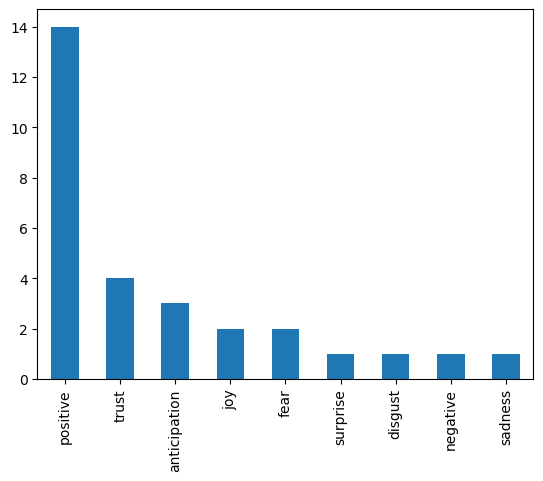

In [13]:
sentiment_result1 = pd.Series(emotion).value_counts()
print(sentiment_result1, sentiment_result1.plot.bar())

Sentiment analysis using NRC for a specific sentence 2

In [14]:
raw = neg_review.lower() # the sentence you want to analyze
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words] # remove stop words
match_words = [x for x in stopped_tokens if x in list(nrc[0])] # match w/ dictionary

In [15]:
emotion = []
for i in match_words :
    temp = list(nrc.iloc[np.where(nrc[0] == i)[0],1])
    for j in temp:
        emotion.append(j)

negative        5
sadness         4
anticipation    3
fear            3
anger           2
positive        2
surprise        2
trust           2
disgust         1
joy             1
Name: count, dtype: int64 Axes(0.125,0.11;0.775x0.77)


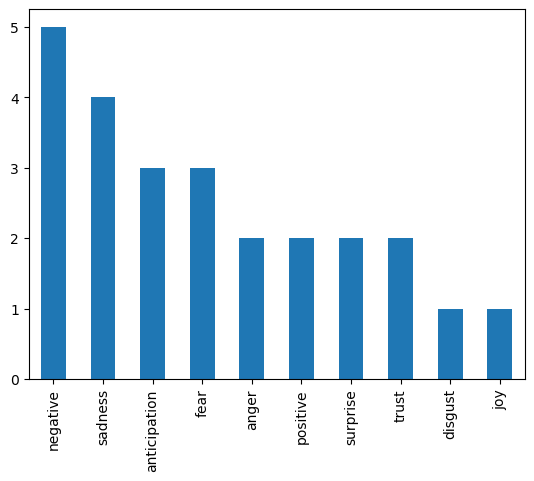

In [16]:
sentiment_result2 = pd.Series(emotion).value_counts()
print(sentiment_result2, sentiment_result2.plot.bar())

**4. VADER Lexion**

In [17]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/junghunlee/nltk_data...


In [18]:
analyser = SentimentIntensityAnalyzer()
example = review['review'][0]
score = analyser.polarity_scores(example)
print(score)

{'neg': 0.203, 'neu': 0.748, 'pos': 0.048, 'compound': -0.9951}


In [19]:
def vader_polarity(text):
    """ Transform the output to a binary 0/1 result """
    score = analyser.polarity_scores(text)
    return 1 if score['pos'] > score['neg'] else 0

Parse only the first n sentences

In [22]:
n = 10
index = []
for row in review['review'][0:n] :
    index.append(row)
    print(len(index), 'Predicted Sentiment polarity:', analyser.polarity_scores(row))
    print(len (index), 'Predicted Sentiment polarity Class:', vader_polarity(row))

1 Predicted Sentiment polarity: {'neg': 0.203, 'neu': 0.748, 'pos': 0.048, 'compound': -0.9951}
1 Predicted Sentiment polarity Class: 0
2 Predicted Sentiment polarity: {'neg': 0.053, 'neu': 0.776, 'pos': 0.172, 'compound': 0.9641}
2 Predicted Sentiment polarity Class: 1
3 Predicted Sentiment polarity: {'neg': 0.094, 'neu': 0.714, 'pos': 0.192, 'compound': 0.9605}
3 Predicted Sentiment polarity Class: 1
4 Predicted Sentiment polarity: {'neg': 0.138, 'neu': 0.797, 'pos': 0.065, 'compound': -0.9213}
4 Predicted Sentiment polarity Class: 0
5 Predicted Sentiment polarity: {'neg': 0.052, 'neu': 0.801, 'pos': 0.147, 'compound': 0.9744}
5 Predicted Sentiment polarity Class: 1
6 Predicted Sentiment polarity: {'neg': 0.017, 'neu': 0.758, 'pos': 0.225, 'compound': 0.9828}
6 Predicted Sentiment polarity Class: 1
7 Predicted Sentiment polarity: {'neg': 0.024, 'neu': 0.871, 'pos': 0.104, 'compound': 0.9022}
7 Predicted Sentiment polarity Class: 1
8 Predicted Sentiment polarity: {'neg': 0.149, 'neu':

**5. SentiWordNet Lexion**

In [23]:
import nltk
nltk.download('wordnet')
nltk.download('sentiwordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

lemmatizer = WordNetLemmatizer()

def penn_to_wn(tag):
    """Convert between the PennTreebank tags to simple Wordnet tags"""
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

def clean_text(text):
    text = text.replace("<br />", " ") # text = text.decode("utf-8")
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/junghunlee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/junghunlee/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


In [24]:
def swn_polarity(text):
    """Return a sentiment polarity: 0 = negative, 1 = positive"""
    sentiment = 0.0
    tokens_count = 0
    text = clean_text(text)
    raw_sentences = sent_tokenize(text)
    for raw_sentence in raw_sentences:
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word, tag in tagged_sentence:
            wn_tag = penn_to_wn(tag)
        if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
            continue
        lemma = lemmatizer.lemmatize(word, pos=wn_tag)
        if not lemma:
            continue
        synsets = wn.synsets(lemma, pos=wn_tag)
        if not synsets:
            continue
        synset = synsets[0] # Take the first sense, the most common
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
    if not tokens_count: # judgment call ? Default to positive or negative
        return 0
    if sentiment >= 0: # sum greater than 0 => positive sentiment
        return 1
    return 0 # negative sentiment

Parse only the first n sentences

In [25]:
n = 10
index = []
for row in review['review'][0 : n] :
    index.append(row)
#print( len (index), 'Sentiment:', row['sentiment'])
print('Predicted Sentiment polarity:', swn_polarity(row))

Predicted Sentiment polarity: 0


**6. Text Blobs**

In [27]:
from textblob import TextBlob
text = '''
The titular threat of The Blob has always struck me as the ultimate movie monster: an insatiably hungry, amoeba-like mass able to penetrate virtually any safeguard, capable of--as a doomed doctor chillingly describes it--"assimilating flesh on contact. Snide comparisons to gelatin be damned, it's a concept with the most devastating of potential consequences, not unlike the grey goo scenario proposed by technological theorists fearful ofartificial intelligence run rampant.
'''
blob = TextBlob(text)
blob.tags[:5] # [('The', 'DT'), ('titular', 'JJ'), # ('threat', 'NN'), ('of', 'IN'), ...]

[('The', 'DT'),
 ('titular', 'JJ'),
 ('threat', 'NN'),
 ('of', 'IN'),
 ('The', 'DT')]

In [29]:
nltk.download('brown')
blob.noun_phrases # WordList(['titular threat', 'blob',
# 'ultimate movie monster', # 'amoeba-like mass', ...])

[nltk_data] Downloading package brown to
[nltk_data]     /Users/junghunlee/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


WordList(['titular threat', 'blob', 'ultimate movie monster', 'amoeba-like mass', 'snide', 'potential consequences', 'grey goo scenario', 'technological theorists fearful ofartificial intelligence run rampant'])

In [30]:
for sentence in blob. sentences :
    print(sentence.sentiment.polarity)

0.06000000000000001
-0.29000000000000004


In [31]:
sentence1 = '''
The platform provides universal access to the world's best education, partnering with top universities and organizations to offer courses online.
'''

polarity and subjectivity

In [32]:
analysis = TextBlob(sentence1).sentiment
print(analysis)
analysisPol = TextBlob(sentence1).polarity # 긍부정
analysisSub = TextBlob(sentence1).subjectivity # 주객관성
print(analysisPol)
print(analysisSub)

Sentiment(polarity=0.5, subjectivity=0.26666666666666666)
0.5
0.26666666666666666


In [33]:
sentence2 = '''This phone's camera image is very good. But, the life time of battery is too short'''
analysis = TextBlob(sentence2).sentiment
print(analysis)
blob2 = TextBlob(sentence2)

for sentence in blob2.sentences:
    print(sentence.sentiment)

Sentiment(polarity=0.45499999999999996, subjectivity=0.54)
Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)
Sentiment(polarity=0.0, subjectivity=0.3)


**7. Korean Sentiment Analysis (NRC Korean processing)**

In [35]:
NRC = pd.read_csv('../../Data/Korean-ko-NRC-Emotion-Intensity-Lexicon-v1.txt', 
                  engine = "python", 
                  header = 0, 
                  sep = "\t")
NRC.head(20)

,word,Korean-ko,emotion,emotion-intensity-score
0,outraged,격분한,anger,0.964
1,brutality,야만성,anger,0.959
2,hatred,증오,anger,0.953
3,hateful,증오심이 많은,anger,0.940
4,terrorize,겁 먹게하다,anger,0.939
5,violently,맹렬히,anger,0.938
6,infuriated,격노 한,anger,0.938
7,furious,맹렬한,anger,0.929
8,enraged,성나게 하는,anger,0.927
9,furiously,격렬히,anger,0.927


Sentiment analysis

In [77]:
review1 = "재미없는 지루한. 같은 음식 영화 인데도 바베트의 만찬하고 너무 차이난다...바베트의 만찬은 이야기도 있고 음식 보는 재미도 있는데 ; 이건 볼게 없는 음식도 별로 안나오고, 핀란드 풍경이라도 구경 하려 했는데 그것도 별로 안나온다 ㅡㅡ"

In [78]:
import numpy as np
tokenizer = RegexpTokenizer('[\w]+')
tokens = tokenizer.tokenize(review1)
print(tokens)

['재미없는', '지루한', '같은', '음식', '영화', '인데도', '바베트의', '만찬하고', '너무', '차이난다', '바베트의', '만찬은', '이야기도', '있고', '음식', '보는', '재미도', '있는데', '이건', '볼게', '없는', '음식도', '별로', '안나오고', '핀란드', '풍경이라도', '구경', '하려', '했는데', '그것도', '별로', '안나온다', 'ㅡㅡ']


In [79]:
match_words = [x for x in tokens if x in list(NRC['Korean-ko'])] # 사전과 매칭
print(match_words)
len(match_words)

['음식', '영화', '음식', '없는']


4

In [80]:
emotion=[]
for i in match_words:
    temp = list(NRC.iloc[np.where(NRC['Korean-ko'] == i)[0],1])
    for j in temp:
        emotion.append(j)
print(emotion)

['음식', '음식', '영화', '영화', '영화', '영화', '음식', '음식', '없는']


In [81]:
sentiment_result1 = pd.Series(emotion).value_counts()
# print(sentiment_result1, sentiment_result1.plot.bar())
sentiment_result1

음식    4
영화    4
없는    1
Name: count, dtype: int64

**8. Using Google Translate**

In [82]:
text = ['Ah dubbing.. Really annoying voice',
        'It was so funny, so I recommend watching it',
        'Its a prison story ..Honestly, its not fun .. Rating adjustment',
        'A movie with Simon Peggs humorous acting that stood out! Kirsten Dunst, who only looked old in Spider-Man, looked so pretty',
        'A movie for 8-year-olds who have just started walking from the age of 3 to the 1st year of elementary school. Hahaha... Its not even worth it.',
        'I couldnt properly revive the tension of the original.',
        'One of the few movies that is interesting even without action',
        'Why is the rating so low? Its quite a sight to behold. Are you too accustomed to Hollywood-style glamour?',
        'Gyan Infinite is the best. Its really cool ♥',
        'Every time I see it I will die of tears! The nostalgic stimulation of the 90s!! Jinho Heo is a master of emotionally restrained melodies~',
        'I almost ran out when I crossed the crosswalk with my hands raised crying, I cant show off Lee Beom-soos acting',
        'Goodbye Lenin, I understand that this is plagiarism, but why does it get less interesting the further back you go',
        'This is a really good mix of real casting and refreshing content that isnt sticky!!♥',
        'Excuse for the looter, ya . Those guys aren\'t good guys at all.',
        'It seems to have a profound meaning. Its never just a movie in which students play with their teachers',
        'I would like to say that it is a masterpiece, not an ordinary movie.',
        'The subject is good, but it gets boring from the middle']

In [83]:
NRC = pd.read_csv ('../../Data/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', 
                   engine = "python", 
                   header = None, 
                   sep = "\t")
NRC.head(20)

,0,1,2
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0
5,aback,negative,0
6,aback,positive,0
7,aback,sadness,0
8,aback,surprise,0
9,aback,trust,0


In [84]:
NRC = NRC[(NRC != 0).all(1)]
NRC.head(10)

,0,1,2
19,abacus,trust,1
23,abandon,fear,1
25,abandon,negative,1
27,abandon,sadness,1
30,abandoned,anger,1
33,abandoned,fear,1
35,abandoned,negative,1
37,abandoned,sadness,1
40,abandonment,anger,1
43,abandonment,fear,1


Column 0 : ( Applicable word ), Column 1 : (10 sentiments ), Column 2 : ( Applicable )

Example ) abacus corresponds to the emotion of trust , and abadon corresponds to the three types of fear, negative,and sadness .

In [85]:
NRC = NRC.reset_index(drop = True)
NRC.head(10)

,0,1,2
0,abacus,trust,1
1,abandon,fear,1
2,abandon,negative,1
3,abandon,sadness,1
4,abandoned,anger,1
5,abandoned,fear,1
6,abandoned,negative,1
7,abandoned,sadness,1
8,abandonment,anger,1
9,abandonment,fear,1


Sentiment analysis using NRC for a specific sentence 1

In [86]:
tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
p_stemmer = PorterStemmer()

In [89]:
len(text)

17

In [90]:
text1 = text[-1]
raw = text1.lower() # target sentence
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words] # remove stop words
match_words = [x for x in stopped_tokens if x in list(NRC[0])] # match w/ dictionary

negative        2
anticipation    1
joy             1
positive        1
surprise        1
trust           1
Name: count, dtype: int64 Axes(0.125,0.11;0.775x0.77)


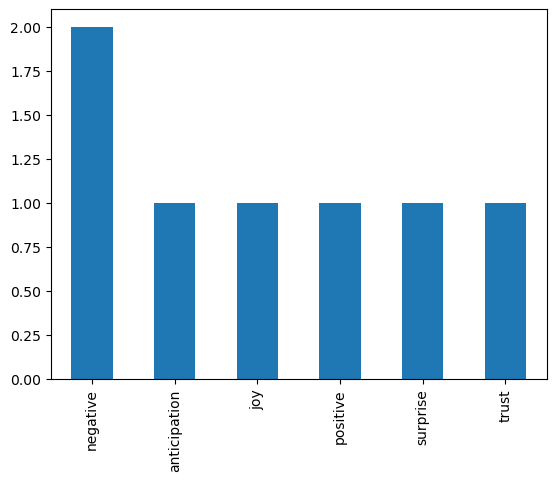

In [91]:
emotion=[]
for i in match_words:
    temp = list(NRC.iloc[np.where(NRC[0] == i)[0],1])
    for j in temp:
        emotion.append(j)
sentiment_result1 = pd.Series(emotion).value_counts()
print(sentiment_result1, sentiment_result1.plot.bar())